#### Necessary Imports/Dataset creation

In [18]:
# # Synthetic Dataset Creation
import random as rand
import pandas as pd
import matplotlib.pyplot as plt

END = "\n------------------------------------------\n"
# def generate_dataset():
#     num_entries = 700
#     df = []
    
#     for _ in range(num_entries):
#         entry = {
#             'att1': rand.randint(0, 1000),
#             'att2': rand.randint(0, 1000),
#             'att3': rand.randint(0, 1000)
#         }
#         df.append(entry)
#     return df

# df = generate_dataset()
# for i in df:
#     print(i)
# print("Number of entries: ", len(df))

# # Export df to a csv file
# pd.DataFrame(df).to_csv('Synthetic.csv')


<br><br>Importing the datasets

In [19]:
synthetic_df = pd.read_csv('Synthetic.csv')
financial_df = pd.read_csv('Financials.csv')

## Synthetic Dataframe ("Synthetic.csv")
Tasks to do:
* statistical descriptions, 
* histogram, 
* box plot, 
* scatter plots, 
* data distribution, 
* identifying missing values, 
* data imputation, 
* Dealing with outliers

#### <br>Statistical Descriptions - Overall description, presence of NULL values

In [20]:
print(synthetic_df.describe(), end=END)
print(synthetic_df.info(), end=END)
print(synthetic_df.isnull().sum(), end=END)


       Unnamed: 0        att1        att2        att3
count   700.00000  700.000000  700.000000  700.000000
mean    349.50000  497.468571  508.697143  473.222857
std     202.21688  287.778921  288.975141  287.199430
min       0.00000    1.000000    0.000000    1.000000
25%     174.75000  247.000000  249.250000  212.500000
50%     349.50000  490.500000  522.000000  451.500000
75%     524.25000  752.250000  768.500000  712.750000
max     699.00000  995.000000  999.000000  998.000000
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  700 non-null    int64
 1   att1        700 non-null    int64
 2   att2        700 non-null    int64
 3   att3        700 non-null    int64
dtypes: int64(4)
memory usage: 22.0 KB
None
------------------------------------------
Unnamed: 0    0
att1          0
att2          

#### <br>Histogram

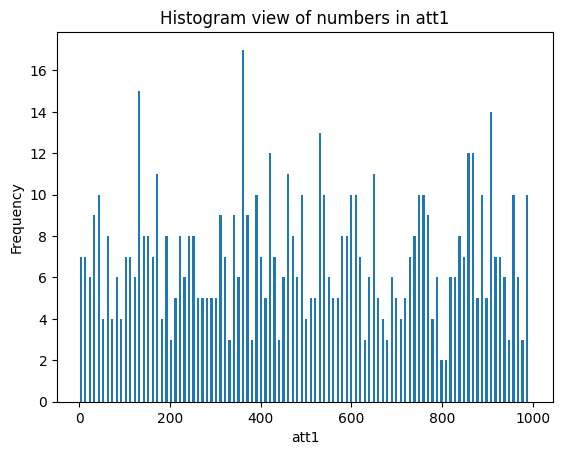

In [25]:
x, y, _ = plt.hist(synthetic_df['att1'], bins=100, width=5)
plt.title("Histogram view of numbers in att1")
plt.xlabel('att1')
plt.ylabel('Frequency')
plt.show()


#### Markdown

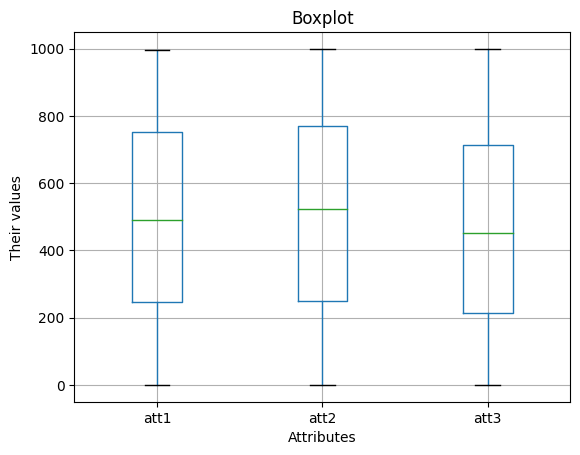

In [26]:
synthetic_df[['att1', 'att2', 'att3']].boxplot()
plt.title('Boxplot')
plt.xlabel('Attributes')
plt.ylabel('Their values')
plt.show()